## Toy model

We have built a toy model showing the difference between the model outputs when we consider the status of the population or not in a feedback loop from a ligand to a receptor. 
The model can be interpreted as a cell differentiation between two cell types T1 and T2. 

The input node I activates a node A, which drives the differntiation into a T1 cell type. In parallel, the node A activates a ligand L, which in turn triggers a receptor R that drives the T2 cell type. To insure mutual exclusivity between the cell types, T2 is only activated in the absence of A and T1 is inhibited by some components of the cascade leading to the T2 cell type.

To simulate both cases considering a unique cell (or a population of homogeneous cells), or taking into account the status of the population (some cells may release L, some may not), we use a single model. We define a parameter `$InnerOn` to distinguish between the two cases: a unique cell or a MetaCell.

The update of the receptor R depends on an external parameter `$innerOn`.

In [1]:
import maboss

# Set up the required files
bnd_file ="ToyModelUP.bnd"
cfg_file = "ToyModelUP.cfg"
upp_file = "ToyModelUP.upp"

# Load and show the MaBoSS model
model_maboss = maboss.load(bnd_file,cfg_file)
model_maboss.print_bnd()

Node I {


	rate_up = 0.0;
	rate_down = 0.0;
}
Node A {

	logic = (I | A);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node L {

	logic = (A | L);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node R {


	rate_up = $innerOn ? (L | R) : $outerL;
	rate_down = $innerOn ? (!(L | R)) : 0.0 ;
}

Node T1 {

	logic = ((A & (!T2)) | T1);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node T2 {

	logic = ((R & (!A)) | T2);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}


The activation of R depends on the ligand L:
- If `$innerOn` is set at 1, R is activated by the state of L inside the cell.
- If `$innerOn` is set at 0, R is activated by the population state of L, through the update function of `$outerL` described in the `upp` file.

In [3]:
# Show the upp file
with open(upp_file, 'r') as ufile:
    print(ufile.read())

$outerL u= 5*p[(L) = (1)];
steps = 20;



Let us consider the two cases. Note that the case "innerOn" (single cell simulation) is equivalent to the simulation using MaBoSS since no variables are updated, i.e. the parameter `$outerL` is not used.

In [4]:
model_maboss = maboss.load(bnd_file,cfg_file)

# Model of a single cell
model_maboss_innerOn = maboss.copy_and_update_parameters(model_maboss,{"$innerOn":1})
model_upmaboss_innerOn = maboss.UpdatePopulation(model_maboss_innerOn, upp_file)

# Model of a population of cells
model_maboss_innerOff = maboss.copy_and_update_parameters(model_maboss,{"$innerOn":0})
model_upmaboss_innerOff = maboss.UpdatePopulation(model_maboss_innerOff, upp_file)

CPU times: user 92 ms, sys: 132 ms, total: 224 ms
Wall time: 1.22 s


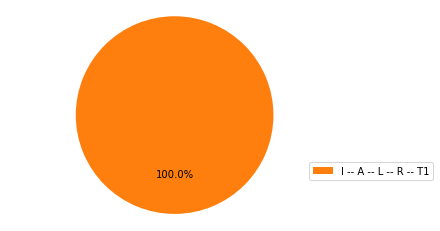

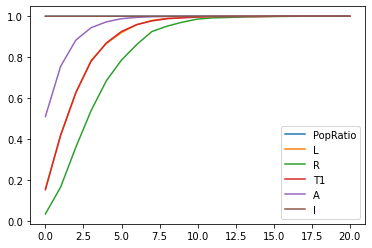

In [5]:
%time ur = model_upmaboss_innerOn.run()

ur.results[-1].plot_piechart()
ur.results[-1]._piefig.savefig("On_pop_pie.pdf")

traj = ur.get_nodes_stepwise_probability_distribution()
p = traj.plot()
p.get_figure().savefig("On_pop_traj.pdf")

CPU times: user 97 ms, sys: 165 ms, total: 262 ms
Wall time: 1.34 s


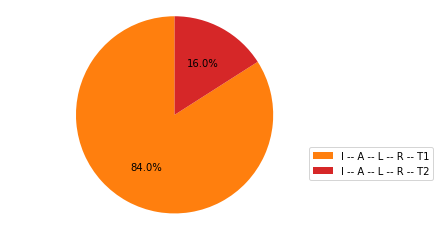

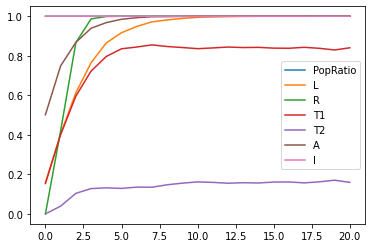

In [6]:
%time ur = model_upmaboss_innerOff.run()

ur.results[-1].plot_piechart()
ur.results[-1]._piefig.savefig("Off_pop_pie.pdf")

traj = ur.get_nodes_stepwise_probability_distribution()
p = traj.plot()
p.get_figure().savefig("Off_pop_traj.pdf")

The node T2 can only be activated if the node R is updated according to the population state of L. This is true because in the model where every reaction can take place inside the cell, if R is present, then A is present as well and inhibits T2 cell type. In the case of the population model, there will be some cells that will have L active (activated by another cell) and A inactive, allowing the differentiation into T2 cell type. 

In [7]:
# Load and show the MaBoSS model
model_maboss = maboss.load(bnd_file,cfg_file)
model_maboss_20 = maboss.copy_and_update_parameters(model_maboss, {'max_time':20})

In [8]:
%time tr = model_maboss_20.run()

CPU times: user 3.43 ms, sys: 10.9 ms, total: 14.3 ms
Wall time: 242 ms
